<table style="width: 100%;" id="nb-header">
    <tr style="background-color: transparent;"><td>
        <img src="https://data-88e.github.io/assets/images/blue_text.png" width="250px" style="margin-left: 0;" />
    </td><td>
        <p style="text-align: right; font-size: 10pt;"><strong>Economic Models</strong>, EdX<br>
            Dr. Eric Van Dusen <br>
        Akhil Venkatesh <br>
</table>

# Lecture Notebook 4.2: Cobb-Douglas Regression and Penn World Tables

The following code is in Pandas - a more advanced data science library you are not required to know.  
Just understanding the outputs of the following cells should be good!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

In [2]:
pwt = pd.read_excel('pwt100.xls', sheet_name='Data')
pwt

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,...,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k
0,ABW,Aruba,Aruban Guilder,1950,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,Aruban Guilder,1951,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,Aruban Guilder,1952,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,Aruban Guilder,1953,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,Aruban Guilder,1954,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12805,ZWE,Zimbabwe,US Dollar,2015,40141.617188,39798.644531,13.814629,6.393752,NaN,2.584653,...,0.140172,-0.287693,-0.051930,0.479228,0.651287,0.541446,0.616689,0.533235,0.422764,1.533909
12806,ZWE,Zimbabwe,US Dollar,2016,41875.203125,40963.191406,14.030331,6.504374,NaN,2.616257,...,0.131920,-0.251232,-0.016258,0.470640,0.651027,0.539631,0.619789,0.519718,0.416510,1.491724
12807,ZWE,Zimbabwe,US Dollar,2017,44672.175781,44316.742188,14.236595,6.611773,NaN,2.648248,...,0.126722,-0.202827,-0.039897,0.473560,0.639560,0.519956,0.619739,0.552042,0.415592,1.514525
12808,ZWE,Zimbabwe,US Dollar,2018,44325.109375,43420.898438,14.438802,6.714952,NaN,2.680630,...,0.144485,-0.263658,-0.020791,0.543757,0.655473,0.529867,0.641361,0.561526,0.425143,1.590120


In [3]:
pwt['countrycode'].unique()

array(['ABW', 'AGO', 'AIA', 'ALB', 'ARE', 'ARG', 'ARM', 'ATG', 'AUS',
       'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BFA', 'BGD', 'BGR', 'BHR',
       'BHS', 'BIH', 'BLR', 'BLZ', 'BMU', 'BOL', 'BRA', 'BRB', 'BRN',
       'BTN', 'BWA', 'CAF', 'CAN', 'CHE', 'CHL', 'CHN', 'CIV', 'CMR',
       'COD', 'COG', 'COL', 'COM', 'CPV', 'CRI', 'CUW', 'CYM', 'CYP',
       'CZE', 'DEU', 'DJI', 'DMA', 'DNK', 'DOM', 'DZA', 'ECU', 'EGY',
       'ESP', 'EST', 'ETH', 'FIN', 'FJI', 'FRA', 'GAB', 'GBR', 'GEO',
       'GHA', 'GIN', 'GMB', 'GNB', 'GNQ', 'GRC', 'GRD', 'GTM', 'GUY',
       'HKG', 'HND', 'HRV', 'HTI', 'HUN', 'IDN', 'IND', 'IRL', 'IRN',
       'IRQ', 'ISL', 'ISR', 'ITA', 'JAM', 'JOR', 'JPN', 'KAZ', 'KEN',
       'KGZ', 'KHM', 'KNA', 'KOR', 'KWT', 'LAO', 'LBN', 'LBR', 'LCA',
       'LKA', 'LSO', 'LTU', 'LUX', 'LVA', 'MAC', 'MAR', 'MDA', 'MDG',
       'MDV', 'MEX', 'MKD', 'MLI', 'MLT', 'MMR', 'MNE', 'MNG', 'MOZ',
       'MRT', 'MSR', 'MUS', 'MWI', 'MYS', 'NAM', 'NER', 'NGA', 'NIC',
       'NLD', 'NOR',

In [4]:
#Graphs of ln(Y/L) vs ln(K/L)
def graph_cobbs(ccodes, begin_date, end_date):
    for ccode in ccodes:
        first = pwt.loc[pwt["countrycode"] == ccode]
        second = first[ (first['year'] >= begin_date) & (first['year'] <= end_date) ]
        third = {}
        third['Y'] = second['cgdpe'] / second['cgdpe'].iloc[0]
        third['K'] = second['cn'] / second['cn'].iloc[0]
        third['L'] = second['emp'] / second['emp'].iloc[0]
        third['YL'] = third['Y'] /third['L']
        third['KL'] = third['K'] /third['L']
        third['lnYL'] = np.log(third['YL'])
        third['lnKL'] = np.log(third['KL'])
        third = pd.DataFrame(third)
        third = third.dropna()
        if(len(third)>0):
            f = plt.figure()
            ax = f.add_subplot(111)
            ax.scatter(third['lnKL'], third['lnYL'], label='')
            m, b, r_value, p_value, std_err = scipy.stats.linregress(third['lnKL'], third['lnYL'])
            ax.plot(third['lnKL'], m*third['lnKL'] + b, label='y = %.4f x + %.4f \n$R^2$ = %.4f' %(m, b, r_value**2))
            ax.legend()
            ax.set_xlabel('ln(K/L)')
            ax.set_ylabel('ln(Y/L)')
            plt.grid()
            ax.set_title(second['country'].iloc[0] + ' (' + ccode + '): '+ str(begin_date) + ' to '+ str(end_date))
            ax.text(0.0, 0.0, "Data Source: Penn World Tables", color='blue', fontstyle='italic', transform=f.transFigure)
            plt.savefig('Cobb-Douglas-' + ccode + '.png')
            plt.show()

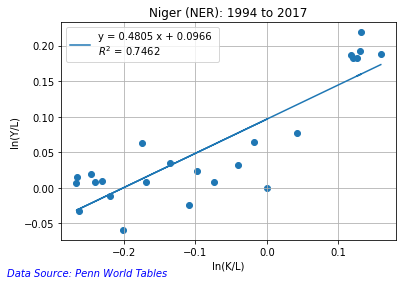

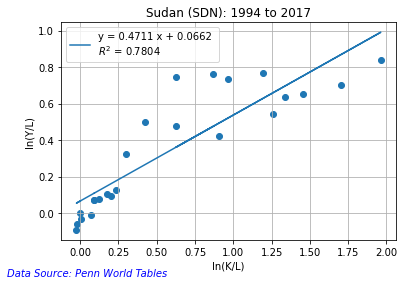

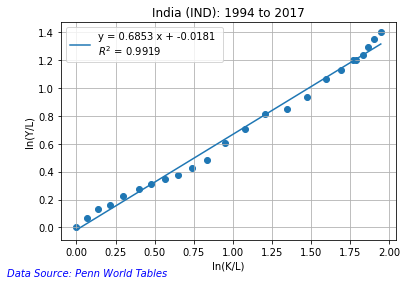

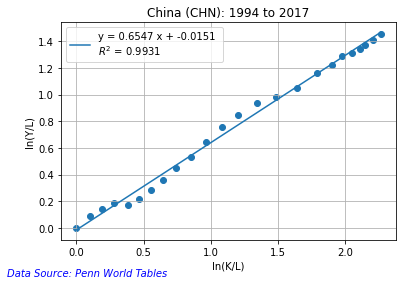

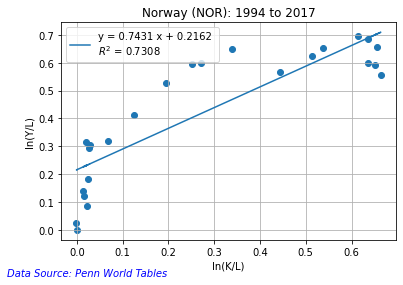

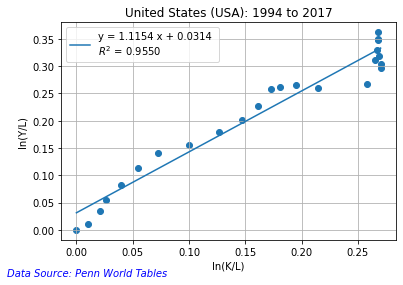

In [5]:
ccodes =['NER','SDN', 'IND', 'CHN', 'NOR', 'USA']
graph_cobbs(ccodes, 1994, 2017)

The coefficient of $x$ represents the relative impact of capital ($K$) on GDP ($Y$). Here is a brief refresher on $\alpha$ and the log form of the Cobb Douglas equation (seen above):
$$\ln{\frac{Y}{L}} = \alpha \ln{\frac{K}{L}} + A$$
$$e^{\ln{\frac{Y}{L}}} = e^{\alpha \ln{\frac{K}{L}} + A}$$
$$\frac{Y}{L} =  (\frac{K}{L})^{\alpha} * e^{A}$$
$$ Y = A K^{\alpha} L^{1 - \alpha}$$

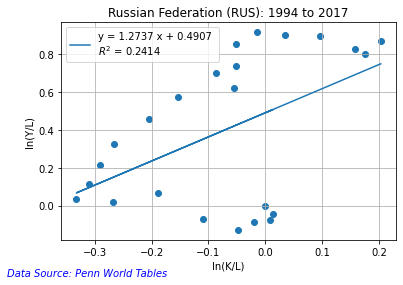

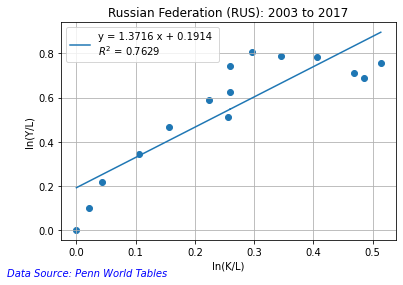

In [6]:
graph_cobbs(['RUS'], 1994, 2017)
graph_cobbs(['RUS'], 2003, 2017)

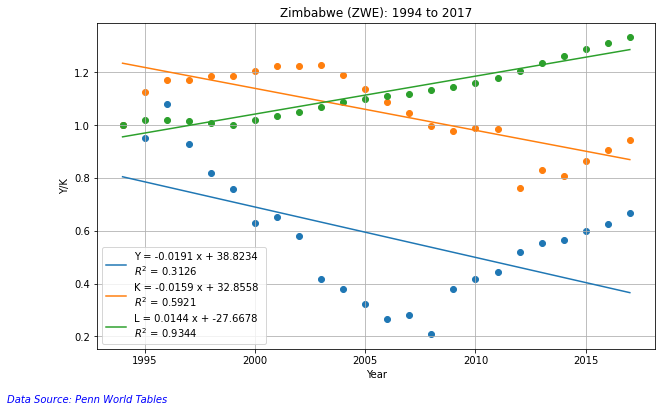

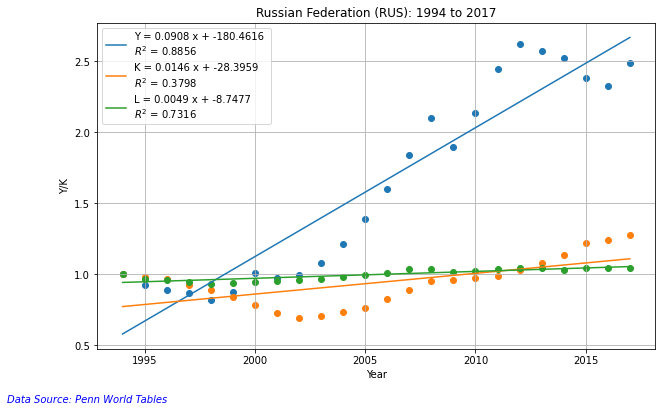

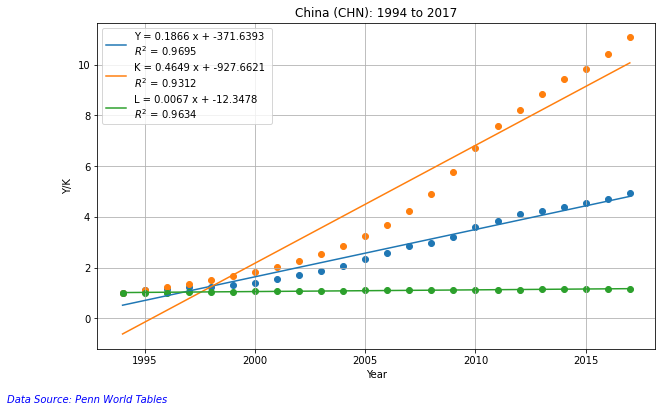

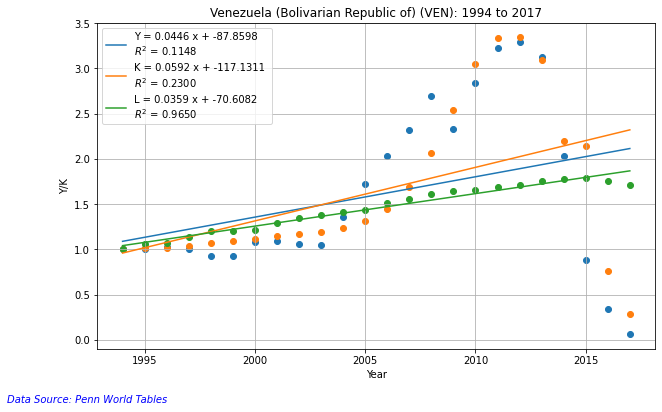

In [7]:
#Graphs of Y and K vs time
begin_date = 1994
end_date = 2017
ccodes = pwt.countrycode.unique().tolist()
ccodes =['ZWE', 'RUS', 'CHN', 'VEN']
for ccode in ccodes:
    first = pwt.loc[pwt["countrycode"] == ccode]
    second = first[ (first['year'] >= begin_date) & (first['year'] <= end_date) ]
    third = {}
    third['year'] = second['year']
    third['Y'] = second['cgdpe'] / second['cgdpe'].iloc[0]
    third['K'] = second['cn'] / second['cn'].iloc[0]
    third['L'] = second['emp'] / second['emp'].iloc[0]
    third['YL'] = third['Y'] /third['L']
    third['KL'] = third['K'] /third['L']
    third['lnYL'] = np.log(third['YL'])
    third['lnKL'] = np.log(third['KL'])
    third = pd.DataFrame(third)
    third = third.dropna()
    if(len(third)>0):
        f = plt.figure(figsize=(10,6))
        ax = f.add_subplot(111)
        ax.scatter(third['year'], third['Y'], label='')
        m_y, b_y, r_value_y, p_value_y, std_err_y = scipy.stats.linregress(third['year'], third['Y'])
        ax.plot(third['year'], m_y*third['year'] + b_y, label='Y = %.4f x + %.4f \n$R^2$ = %.4f' %(m_y, b_y, r_value_y**2))
        ax.scatter(third['year'], third['K'], label='')
        m_k, b_k, r_value_k, p_value_k, std_err_k = scipy.stats.linregress(third['year'], third['K'])
        ax.plot(third['year'], m_k*third['year'] + b_k, label='K = %.4f x + %.4f \n$R^2$ = %.4f' %(m_k, b_k, r_value_k**2))
        ax.scatter(third['year'], third['L'], label='')
        m_l, b_l, r_value_l, p_value_l, std_err_l = scipy.stats.linregress(third['year'], third['L'])
        ax.plot(third['year'], m_l*third['year'] + b_l, label='L = %.4f x + %.4f \n$R^2$ = %.4f' %(m_l, b_l, r_value_l**2))
        ax.legend()
        ax.set_xlabel('Year')
        ax.set_ylabel('Y/K')
        plt.grid()
        ax.set_title(second['country'].iloc[0] + ' (' + ccode + '): '+ str(begin_date) + ' to '+ str(end_date))
        ax.text(0.0, 0.0, "Data Source: Penn World Tables", color='blue', fontstyle='italic', transform=f.transFigure)
        plt.savefig('Cobb-Douglas-' + ccode + '.png')
        plt.show()